# Malicious URL Filter 

6006-CEM Coursework - Project

# 1. Objective
The object of the notebook is to classify if an URL is malicious or legitimate. A phishing website is a threat in the cybersecurity, one of the most popular social engineering type of attacks. A malicious urls host untrusted data with the idea to lure users to become victims of scam. Most of the times, the victim ends up compromising personal information. 

# 2. Data Collection

The Dataset used in the notebook is gathered from several sources. 

For the project we use great amount of urls, labeled as (1) Malicious and (0) Benign.

The Dataset for the malicious urls has been taken from 'http://phishtank.org/developer_info.php', which provides us with almost 15000 phishing urls. The dataset is being updated hourly.

In the process of collecting the dataset of benign urls, we used source such as : 'https://www.kaggle.com/' and a dataset from University of New Brunswick - https://www.unb.ca/cic/datasets/url-2016.htm. One of the datasets contains almost over 35000 benign URLs. 
 

In [1]:
# Importing required packages

import pandas as pd
import numpy as np


# 3. Malicious URLs

Saving the data from phishtank into a dataframe which will be pre-process later.

In [2]:
# Loading the malicious URLs data 
# by calling the function 'read_csv' a dataframe is created
data_phishing = pd.read_csv("phishing_url.csv")
# showing the first 5 URLs from the datarame by slicing the object
data_phishing.iloc[0:5]


,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
0,6852013,https://pubgeventgetnow.com/,http://www.phishtank.com/phish_detail.php?phis...,2020-11-17T08:05:01+00:00,yes,2020-11-17T08:06:46+00:00,yes,Other
1,6852012,http://pubgeventgetnow.com/,http://www.phishtank.com/phish_detail.php?phis...,2020-11-17T08:05:00+00:00,yes,2020-11-17T08:06:46+00:00,yes,Other
2,6852011,https://biolinky.co/infopubgmobile2020,http://www.phishtank.com/phish_detail.php?phis...,2020-11-17T08:04:45+00:00,yes,2020-11-17T08:06:02+00:00,yes,Other
3,6852009,https://hallosp.in/,http://www.phishtank.com/phish_detail.php?phis...,2020-11-17T08:03:46+00:00,yes,2020-11-17T08:06:02+00:00,yes,Other
4,6852001,https://www.rakuten-c0.jp3.4efa7aed6eaefc9b1ac...,http://www.phishtank.com/phish_detail.php?phis...,2020-11-17T07:59:32+00:00,yes,2020-11-17T08:03:53+00:00,yes,Other


# 3.1 Familiarising with the dataframe  

In [3]:
# Describing all columns of the DataFrame regardless the data type
data_phishing.describe(include='all')

,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
count,1.493100e+04,14931,14931,14931,14931,14931,14931,14931
unique,NaN,14927,14931,14028,1,10532,1,92
top,NaN,http://profinishmi.com/dd/Upgrade/verify/mail....,http://www.phishtank.com/phish_detail.php?phis...,2020-11-08T23:08:57+00:00,yes,2020-11-16T14:13:51+00:00,yes,Other
freq,NaN,2,1,13,14931,23,14931,12876
mean,6.602575e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.419109e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.491590e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.540191e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.737751e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.838918e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Prints a summary of all the columns in the DataFrame
# the summary uncludes the index dtype and columns, non-null values and memory usage.
data_phishing.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14931 entries, 0 to 14930
Data columns (total 8 columns):
phish_id             14931 non-null int64
url                  14931 non-null object
phish_detail_url     14931 non-null object
submission_time      14931 non-null object
verified             14931 non-null object
verification_time    14931 non-null object
online               14931 non-null object
target               14931 non-null object
dtypes: int64(1), object(7)
memory usage: 933.3+ KB


In [5]:
# Checking for missing values accross columns
# Return a boolean object indicating if any values accross the columns are None
# in case of null values the object gets mapped to True values. 
# Everything else gets mapped to False values.
data_phishing.isnull().any()

phish_id             False
url                  False
phish_detail_url     False
submission_time      False
verified             False
verification_time    False
online               False
target               False
dtype: bool

In [6]:
# Returns a tuple representing the dimensionality of the DataFrame
data_phishing.shape

(14931, 8)

The aim of the notebook is to use 7500 benign URLs and 7500 Malicious URL, later combined into one dataset.
Therefore, we picking a sample of 7500 Malicious URLs randomly

In [7]:
# Extracting 7500 Malicious URLs randomly from the dataframe

# Return a random sample of items from an object
# We use random_state for reproducibility.

phishing_data = data_phishing.sample(n = 7500, random_state = 12).copy(deep=True)

# a new object will be created with a copy of the calling object’s data and indices. 
# Modifications to the data or indices of the copy will not be reflected in the original object.

# Reset the index of the DataFrame once we have picked the 7500 samples
# This resets the index to the default integer index.

phishing_data = phishing_data.reset_index(drop=True)

# We make sure we retrieved exactly 7500 urls.
phishing_data.tail()


,phish_id,url,phish_detail_url,submission_time,verified,verification_time,online,target
7495,2406142,http://www.jeffreybcam.net/wp-admin/new/admini...,http://www.phishtank.com/phish_detail.php?phis...,2014-04-16T07:13:55+00:00,yes,2014-04-26T09:45:00+00:00,yes,Other
7496,6368220,http://cafecitoperez.ivanidzakovic.com/admin/a...,http://www.phishtank.com/phish_detail.php?phis...,2020-01-23T14:05:24+00:00,yes,2020-01-23T14:51:43+00:00,yes,Other
7497,6851079,https://lloydsbank.authenticate-device-registr...,http://www.phishtank.com/phish_detail.php?phis...,2020-11-16T14:16:19+00:00,yes,2020-11-16T14:19:37+00:00,yes,Other
7498,6720133,http://dimasrv.com/,http://www.phishtank.com/phish_detail.php?phis...,2020-08-05T15:44:40+00:00,yes,2020-08-05T15:48:26+00:00,yes,Other
7499,6714171,http://www.sexologistdoctors.com/wp-content/pl...,http://www.phishtank.com/phish_detail.php?phis...,2020-08-02T07:04:17+00:00,yes,2020-08-02T07:06:14+00:00,yes,Other


In [8]:
# Return the Dataframe with duplicate rows removed, if any.
phishing_data.drop_duplicates(inplace=True)

# We check if any rows have been removed.
phishing_data.shape


(7500, 8)

# 4. Legitimate URLs

The legitimate URLs has been gathered from the sources mentioned above and combined manually into one. 

The same techniques showed above for the "3. Malicious URLs" section will be applied here as well.

In [9]:
# Loadiang the legitimate URLs data to a dataframe
data_benign = pd.read_csv("benign_url.csv")
# The dataframe comes raw so we add an column name 
data_benign.columns = ["URLs"]
# Showing the first five URLs from the dataframe by slicing the object
data_benign.iloc[0:5]

,URLs
0,http://1337x.to/torrent/1110018/Blackhat-2015-...
1,http://1337x.to/torrent/1122940/Blackhat-2015-...
2,http://1337x.to/torrent/1124395/Fast-and-Furio...
3,http://1337x.to/torrent/1145504/Avengers-Age-o...
4,http://1337x.to/torrent/1160078/Avengers-age-o...


# 4.1 Familiarising with the dataframe  


In [10]:
# Prints a summary of all the columns in the DataFrame
data_benign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35377 entries, 0 to 35376
Data columns (total 1 columns):
URLs    35377 non-null object
dtypes: object(1)
memory usage: 276.5+ KB


In [15]:
# Describing all columns of the DataFrame regardless the data type
data_benign.describe(include='all')

,URLs
count,35377
unique,35377
top,http://katproxy.com/community/show/congrats-ou...
freq,1


In [16]:
# Checking for any missing values accross columns
data_benign.isnull().any()

URLs    False
dtype: bool

In [17]:
#Returns a tuple representing the dimensionality of the DataFrame.
data_benign.shape

(35377, 1)

In [18]:
# Extracting 7500 Benign URLs randomly from the dataframe
# The same technique for collecting a sample of 7500 Legitimate urls is applied here
benign_data = data_benign.sample(n = 7500, random_state = 12).copy(deep=True)
benign_data = benign_data.reset_index(drop=True)

In [19]:
benign_data.tail()

,URLs
7495,http://nypost.com/2015/05/01/apple-admits-tatt...
7496,http://icicibank.com/Personal-Banking/insuranc...
7497,http://thenextweb.com/socialmedia/2012/05/30/f...
7498,http://distractify.com/post/related/id/5553577...
7499,http://ringring.vn/kinh-hoang-giay-phut-vo-chu...


In [20]:
# Returns the dataframe with removed duplicates if any
benign_data.drop_duplicates(inplace=True)
# Checks if the dataframe has any changes
benign_data.shape

(7500, 1)

# 5. Feature Extraction

In this section of the notebook, we perform a feature extraction.
The features will be split into three groups:

# 1. URL-Based Features
# 2. Page-Based Feature
# 3. Domain-Based Feature

In [21]:
# Importing required packages for this section
#!pip install python-whois
from bs4 import BeautifulSoup
from urllib.parse import urlencode,urlparse,urlsplit
import urllib
import urllib.request
import requests
import ipaddress
#import whois
import re

# 5.1 URL - Based Features - functions



#### Replace the subomain of the URL with an empty space. This feature - checks for the presence of an subdomain and if the function gets a match we replace it with an empty string

In [22]:
def remove_subDomain(url):
    subDomain = urlparse(url).netloc
    if re.match(r"^www.",subDomain):
        subDomain = subDomain.replace("www.","")
    return subDomain

#### In this function everything that does not match the protocol will be flaged as malicious.However, most of the phishing attacks have become very sophisticated and the attackers easily manage to add Secure Sockets Layer(SSL) in order to trick users. The feature by itself would not be enough to classify if the URL is malicious or not, but combined with the rest will contribute to the object of the notebook.

In [23]:
# Checks the URL's protocol in the domain 
def check_protocol(url):
    protocol = urlparse(url)
    if re.match(r"^https?://",protocol.geturl()):
    
        return 0
    else:
        return 1

#### The function makes use of the 'ipaddress' package. The regular expression will match any IP address in the range of '00' to '333'. Therefore, the package  'ipaddress' will validate if the IP address is IPv4 or IPv6 to avoid inconveniences. A ValueError is raised if address does not represent a valid IPv4 or IPv6 address

In [24]:
#Checks for a presence of an IP address instead of a domain name
def ip_addr(url):
    ip = 0
    try:
        domain_IP = urlparse(url)
        if re.match(r"\b(?:\d{1,3}\.){3}\d{1,3}\b",domain_IP.netloc):
            validation = ipaddress.ip_address(domain_IP.netloc)
            ip = 1      
    except:
        print(f'ValueError: {domain_IP.netloc} does not appear to be an IPv4 or IPv6 address')
    else:
        ip = 0 
        
    return ip

#### If an URL contains more than four periods in its structure, the function will flag it as malicious. 

In [25]:
#Checks for the occurance of the character '.' in the URL
def get_period(url):
    
    get_URL = urlparse(url)
    
    obj = re.findall(r"\.", get_URL.geturl())
    
    if '.' in obj and len(obj) > 4:
        period = 1
    else:
        period = 0
        
    return period

#### Great average word length in the URL structure will be flaged as malicious. After parsing the url, the components are splitted into list. Using python's map function, each component is mapped to its length and devided by the length of the list, which returns the average length. If the total average of the words is greater or equal to 15 the function will flag the url as malicious

In [26]:
def average_word_len(url):
    
    parse_url = urlsplit(url)
  
    geturl = parse_url.geturl()
  
    split_into_list = geturl.split('/')
    total_avg = sum( map(len, split_into_list) ) / len(split_into_list)
    if total_avg >= 15:
        return 1
    else:
        return 0

#### After parsing an URL, one if its components is 'path'. This function will check the length of the url's path and flag it as malicious if the length is greater or equal to 30.

In [27]:
#Checks for the path length of the URL
def get_path_length(url):
    
    url_len = urlparse(url).path
    
    if len(url_len) >= 30:
        
        length = 1
        
    else:
         length = 0
         
         
    return length

#### In a legitimate URL, the double forward slashes must occur only at position '6' if the protocol used on the webpage is 'https'. If the last occurance is not in that position, the function flags it as malicious. The reason behind is that the double slash is most likely a result of an error somewhere or a malicious act. However, some servers are setup to ignore another occurance of a double forward slash. An occurance of another double forward slash might be a case of an redirection to a malicious page.

In [28]:
#Checks for the last occurance of "double forward slashes" in the URL
def check_double_slash(url):
    
    double_slash = url.rfind('//')
    
    if double_slash != 6:
        
        return 1
        
    else:
        return 0
    

#### Using “@” symbol in the URL leads the browser to ignore everything preceding the “@” symbol  and the real address often follows the “@” symbol.

In [29]:
# Counts the Ats in an url, if they are any present the function returns 1 otherwise 0 
def containsAt(url):
    count = url.count('@')
    if count >= 1:
        return 1
    else:
        return 0

#### Additional functions for feature extraction. In the notebook we want to extract as much as we can from the URLs so the model can learn and perform better.

In [30]:
def sub_dir(url):
    return url.count('/')

In [31]:
def containsHyphen(url):
    return url.count('-')

In [32]:
def countQueries(url):
    return url.count('&')

# 5.3 Page-Based Feature

#### This feature uses Alexa rank - web traffic analyzer. Alexa rank will return a Global Rank of the website and information about the page. Based on the information provided, the function decides if the URL is malicious or not. The function uses the BeautifulSoup package in order to perform a web scraping over the web page.

### DISCLAIMER  

#### The feature would not make into the final notebook because amazon alexa rank API is not a free feature and it is payed per request. The function has been tested and the returns the expected value, however after trying to apply the function on a dataset, due to the high amount of requests - alexa rank blocked my IP.   

In [161]:
    #Access alexa rank and retrieve the ranking of the URL

def alexa_rank(url):
    
    try:
        url = urllib.parse.quote(url)
        rank_str = BeautifulSoup(urllib.request.urlopen("https://www.alexa.com/minisiteinfo/"+url).read(),
                                'lxml').table.a.get_text()
        rank_int = int(rank_str.replace(',',''))
        
    except Exception as e:
        print(f'No information for {url}: No data available')
        return 1 
    
    if rank_int >= 1000000:
        return 1
    else:
        return 0


# 5.4 Domain-Based Feature

#### The function checks for the DNS records of the URL by using the 'whois' python package.  The purpose of the feature is to perform a whois lookup to check if the server host of the webpage is valid. In case of no information about the server host, creation_date, etc. the URL will be flaged as malicious.

## Disclaimer 

#### Unfortunately, the function does not work as expected with this particular dataset. The infromation retrieved by the function causes inconveniences once applied on the dataframe. However, the feature would be a great fit to the notebook which aim is phishing url detection. Therefore, the function will remain in the final notebook even though it will not be applied on the dataset.

In [162]:
# Perform a DNS lookup on the IP address
def is_valid(url):
    try:
        whois_info = whois.whois(url)
        print(f'Domain registrar for:{url}',whois_info.registrar, whois_info.whois_server,
              whois_info.creation_date,
              whois_info.expiration_date)
        if whois_info.registrar == None or whois_info.whois_server == None or whois_info.creation_date == None or whois_info.expiration_date == None:
            return 1 
        else:
            return 0
    
    except Exception as e:
        return 1

# End of Custom Feature Extraction. 

## In total 13 features have been extracted, but only 11 of them will be applied on the dataset due to the reasons mentioned above. 

## The 'Page - Based  and Domain - Based' feature will remain in this notebook, unused. However, their implementation might be developed  and applied in the future.

# 6. Feature extraction 

### 6.1 Applying the custom features on a copy of the legitimate URLs.
### Creating a new dataframe will save some inconveniences later on in the notebook.

In [33]:
# Make a copy of this object’s indices and data.
# Any modifications to the new data or indices will not be reflected in the original data
legitimate = pd.DataFrame(benign_data).copy(deep=True)

In [34]:
# Checking if the copy of the data was coppied correctly
legitimate.head()

,URLs
0,http://graphicriver.net/search?date=this-month...
1,http://ecnavi.jp/redirect/?url=http://www.cros...
2,https://hubpages.com/signin?explain=follow+Hub...
3,http://extratorrent.cc/torrent/4190536/AOMEI+B...
4,http://icicibank.com/Personal-Banking/offers/o...


### Applying the functions on the DataFrame  
### The returned values from the functions will be saved in newly created columns in the dataframe

In [36]:
def benign_feature_extraction():
    
    legitimate['domain'] = legitimate["URLs"].apply(remove_subDomain)
    legitimate['protocol'] = legitimate["URLs"].apply(check_protocol)
    legitimate['ip_addr'] = legitimate["URLs"].apply(ip_addr)
    legitimate['get_period'] = legitimate["URLs"].apply(get_period)
    legitimate['average_word_len'] = legitimate["URLs"].apply(average_word_len)
    legitimate['path_length'] = legitimate["URLs"].apply(get_path_length)
    legitimate['check_double_slash'] = legitimate["URLs"].apply(check_double_slash)
    legitimate['containsAt'] = legitimate["URLs"].apply(containsAt)
    legitimate['sub_dir'] = legitimate["URLs"].apply(sub_dir)
    legitimate['containsHyphen'] = legitimate["URLs"].apply(containsHyphen)
    legitimate['countQueries'] = legitimate["URLs"].apply(countQueries)
    legitimate['Label'] = 0
    
benign_feature_extraction()

# 6.1.1 Data analyzing 

#### The functions have been applied on the dataset 
#### Next step is to familiarize ourselves with the new DataFrame

In [37]:
# Function to analyze the data and return a report 

def print_report():
    print('----------------------------------------')
    print('    |                             |')
    print('    | DataFrame : Legitimate URLs |')
    print('    |                             |')
    print('----------------------------------------\n')
    print('Columns in the DataFrame:\n')
    print(legitimate.columns.values,'\n')
    print('-----------------------------------------\n')
    print('Summary of all the columns:\n')
    print(legitimate.info(),'\n')
    print('-----------------------------------------\n')
    print('Summary of the first 5 objects from the DataFrame\n')
    print(legitimate.iloc[0:5],'\n')
    print('-----------------------------------------\n')
    print('Detect missing values in the DataFrame:\n')
    print(legitimate.isnull().sum(),'\n')
    print('-----------------------------------------\n')
    print('Shape of the DataFrame:\n')
    print(legitimate.shape)
    print('-----------------------------------------')
print_report()

----------------------------------------
    |                             |
    | DataFrame : Legitimate URLs |
    |                             |
----------------------------------------

Columns in the DataFrame:

['URLs' 'domain' 'protocol' 'ip_addr' 'get_period' 'average_word_len'
 'path_length' 'check_double_slash' 'containsAt' 'sub_dir' 'containsHyphen'
 'countQueries' 'Label'] 

-----------------------------------------

Summary of all the columns:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 0 to 7499
Data columns (total 13 columns):
URLs                  7500 non-null object
domain                7500 non-null object
protocol              7500 non-null int64
ip_addr               7500 non-null int64
get_period            7500 non-null int64
average_word_len      7500 non-null int64
path_length           7500 non-null int64
check_double_slash    7500 non-null int64
containsAt            7500 non-null int64
sub_dir               7500 non-null int64
contains

In [38]:
# By default the first 5 rows for the object are returned. 
# Quick double-checking if our objects have the right type of data.
legitimate.head()

,URLs,domain,protocol,ip_addr,get_period,average_word_len,path_length,check_double_slash,containsAt,sub_dir,containsHyphen,countQueries,Label
0,http://graphicriver.net/search?date=this-month...,graphicriver.net,0,0,0,1,0,1,0,3,1,9,0
1,http://ecnavi.jp/redirect/?url=http://www.cros...,ecnavi.jp,0,0,0,0,0,1,0,7,1,2,0
2,https://hubpages.com/signin?explain=follow+Hub...,hubpages.com,0,0,0,1,0,0,0,3,3,1,0
3,http://extratorrent.cc/torrent/4190536/AOMEI+B...,extratorrent.cc,0,0,0,1,1,1,0,5,0,0,0
4,http://icicibank.com/Personal-Banking/offers/o...,icicibank.com,0,0,0,1,1,1,0,5,6,0,0


## A new dataset has been created and populated by the custom functions with new values. The new DataFrame will be saved on a new csv file

In [39]:
legitimate.to_csv('legitimate_urls.csv', index=False)

# 6.2 Applying the custom features on a copy of the phishing URLs.

In [54]:
# Make a copy of this object’s indices and data into our new DataFrame
malicious = pd.DataFrame(phishing_data["url"]).copy(deep=True)

In [55]:
malicious.head()

,url
0,https://sekabetgiriskayit.blogspot.com/
1,http://www.kidscoloringpdf.com/wp-content/xxx/...
2,http://kashmir-packages.com/.well-known/wp/log...
3,http://newsimdigital.com/doc
4,https://secure07c-secure-user-verification.ser...


### To avoid inconveniences in the future, the column name will be changed.So that both names of the DataFrame's  columns will match.

In [56]:
# Change the name of the required column and apply it to the actual dataframe
# if inplace is set to False, the method will return a copy
malicious.rename(columns = {"url":"URLs"}, inplace = True)


In [57]:
# Double-checking if the new DataFrame is loaded correctly with the new column name
malicious.head()

,URLs
0,https://sekabetgiriskayit.blogspot.com/
1,http://www.kidscoloringpdf.com/wp-content/xxx/...
2,http://kashmir-packages.com/.well-known/wp/log...
3,http://newsimdigital.com/doc
4,https://secure07c-secure-user-verification.ser...


### Applying the functions on the DataFrame  
### The same technique used above for the "legitimate" DataFrame will be applied here as well. 

In [59]:
def malicious_feature_extraction():
    
    malicious['domain'] = malicious["URLs"].apply(remove_subDomain)
    malicious['protocol'] = malicious["URLs"].apply(check_protocol)
    malicious['ip_addr'] = malicious["URLs"].apply(ip_addr)
    malicious['get_period'] = malicious["URLs"].apply(get_period)
    malicious['average_word_len'] = malicious["URLs"].apply(average_word_len)
    malicious['path_length'] = malicious["URLs"].apply(get_path_length)
    malicious['check_double_slash'] = malicious["URLs"].apply(check_double_slash)
    malicious['containsAt'] = malicious["URLs"].apply(containsAt)
    malicious['sub_dir'] = malicious["URLs"].apply(sub_dir)
    malicious['containsHyphen'] = malicious["URLs"].apply(containsHyphen)
    malicious['countQueries'] = malicious["URLs"].apply(countQueries)
    malicious['Label'] = 1
    
malicious_feature_extraction()

ValueError: 154.30.211.130.bc.googleusercontent.com does not appear to be an IPv4 or IPv6 address
ValueError: 51.255.68.3:8011 does not appear to be an IPv4 or IPv6 address


#### The ValueErrors above are handled by the function's except statement. 

# 6.2.1 Data analyzing 

#### The functions have been applied on the DataFrame
#### Next step is to familiarize ourselves with the new data

In [52]:
# Function to analyze the data and return a report 

def print_report():
    print('----------------------------------------')
    print('    |                             |')
    print('    | DataFrame : Malicious URLs  |')
    print('    |                             |')
    print('----------------------------------------\n')
    print('Columns in the DataFrame:\n')
    print(malicious.columns.values,'\n')
    print('-----------------------------------------\n')
    print('Summary of all the columns:\n')
    print(malicious.info(),'\n')
    print('-----------------------------------------\n')
    print('Summary of the first 5 objects from the DataFrame\n')
    print(malicious.iloc[0:5],'\n')
    print('-----------------------------------------\n')
    print('Detect missing values in the DataFrame:\n')
    print(malicious.isnull().sum(),'\n')
    print('-----------------------------------------\n')
    print('Shape of the DataFrame:\n')
    print(malicious.shape)
    print('-----------------------------------------')
print_report()

----------------------------------------
    |                             |
    | DataFrame : Malicious URLs  |
    |                             |
----------------------------------------

Columns in the DataFrame:

['URLs' 'domain' 'protocol' 'ip_addr' 'get_period' 'average_word_len'
 'path_length' 'check_double_slash' 'containsAt' 'countSubDir'
 'isPresentHyphen' 'countQueries' 'Label' 'sub_dir' 'containsHyphen'] 

-----------------------------------------

Summary of all the columns:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7500 entries, 0 to 7499
Data columns (total 15 columns):
URLs                  7500 non-null object
domain                7500 non-null object
protocol              7500 non-null int64
ip_addr               7500 non-null int64
get_period            7500 non-null int64
average_word_len      7500 non-null int64
path_length           7500 non-null int64
check_double_slash    7500 non-null int64
containsAt            7500 non-null int64
countSubDir       

In [60]:
# Quick double-checking if our objects have the right type of data.
malicious.head()

,URLs,domain,protocol,ip_addr,get_period,average_word_len,path_length,check_double_slash,containsAt,sub_dir,containsHyphen,countQueries,Label
0,https://sekabetgiriskayit.blogspot.com/,sekabetgiriskayit.blogspot.com,0,0,0,0,0,0,0,3,0,0,1
1,http://www.kidscoloringpdf.com/wp-content/xxx/...,kidscoloringpdf.com,0,0,0,0,1,1,0,8,1,0,1
2,http://kashmir-packages.com/.well-known/wp/log...,kashmir-packages.com,0,0,0,1,0,1,0,5,2,2,1
3,http://newsimdigital.com/doc,newsimdigital.com,0,0,0,0,0,1,0,3,0,0,1
4,https://secure07c-secure-user-verification.ser...,secure07c-secure-user-verification.serveuser.com,0,0,0,0,0,0,0,5,3,0,1


## A new dataset has been created and populated by the custom functions with new values. The new DataFrame will be saved on a new csv file

In [62]:
malicious.to_csv('malicious_urls.csv', index=False)

# 7. Final concatenated Data 

### In the previous section, two new dataframes were created - legitimate and malicious. In order to continue with the notebook we will concatenate them into one final dataset. 

In [63]:
# Concatenating two DataFrames 
# if ignore_index = True, we do not use the index values along
# the concatenation axis
frame =[malicious, legitimate]
concat_data = pd.concat(frame, ignore_index=True)

## Even though we analyzed the two dataframes seperately, performing the same method here as well, might save us some inconveniences later on 

In [64]:
# Function to analyze the data and return a report 

def print_report():
    print('----------------------------------------')
    print('    |                             |')
    print('    | DataFrame : Final Data      |')
    print('    |                             |')
    print('----------------------------------------\n')
    print('Columns in the DataFrame:\n')
    print(concat_data.columns.values,'\n')
    print('-----------------------------------------\n')
    print('Summary of all the columns:\n')
    print(concat_data.info(),'\n')
    print('-----------------------------------------\n')
    print('Summary of the first 5 objects from the DataFrame\n')
    print(concat_data.iloc[0:5],'\n')
    print('-----------------------------------------\n')
    print('Summary of the last 5 objects from the DataFrame\n')
    print(concat_data.tail(),'\n')
    print('-----------------------------------------\n')
    print('Detect missing values in the DataFrame:\n')
    print(concat_data.isnull().sum(),'\n')
    print('-----------------------------------------\n')
    print('Shape of the DataFrame:\n')
    print(concat_data.shape)
    print('-----------------------------------------')
print_report()

----------------------------------------
    |                             |
    | DataFrame : Final Data      |
    |                             |
----------------------------------------

Columns in the DataFrame:

['URLs' 'domain' 'protocol' 'ip_addr' 'get_period' 'average_word_len'
 'path_length' 'check_double_slash' 'containsAt' 'sub_dir' 'containsHyphen'
 'countQueries' 'Label'] 

-----------------------------------------

Summary of all the columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
URLs                  15000 non-null object
domain                15000 non-null object
protocol              15000 non-null int64
ip_addr               15000 non-null int64
get_period            15000 non-null int64
average_word_len      15000 non-null int64
path_length           15000 non-null int64
check_double_slash    15000 non-null int64
containsAt            15000 non-null int64
sub_dir               15000 non-null in

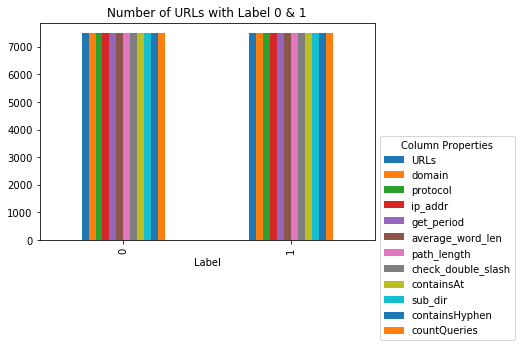

In [65]:
# Import required package 
import matplotlib.pyplot as plt
    
# A groupby operation is used to combine the Column 'Label', applying a function count()
# In order to get all occurrences of 0 and 1 in the column and plot the result. 

concat_data.groupby(concat_data['Label']).count().plot(kind='bar', legend= True)
# Set a title name for the plot
plt.title('Number of URLs with Label 0 & 1')

# Change the paremeters of the legend such as - location on the plot, title
# The bbox argument  allows arbitrary placement of the legend.
plt.legend(loc='best', bbox_to_anchor=(1,0.5,0,0), title="Column Properties")

# Displaying the Barplot 
plt.show()

### The output proves that the data has been concatenated correctly. The new DataFrame has equal number of legitimate and malicious URLs with 11 features extracted.

In [66]:
# The URLs column is irrelevant to the next Sections
# So we drop the column from the DataFrame
print(concat_data)
concat_data.drop(['URLs'], axis =1 , inplace=True)

                                                    URLs  \
0                https://sekabetgiriskayit.blogspot.com/   
1      http://www.kidscoloringpdf.com/wp-content/xxx/...   
2      http://kashmir-packages.com/.well-known/wp/log...   
3                           http://newsimdigital.com/doc   
4      https://secure07c-secure-user-verification.ser...   
5      http://stg.qureshimedia.com/wp-includes/thermo...   
6                      https://three-keychain-info.co.uk   
7                    https://halifax-payee-security.net/   
8                      http://sepcial-updater.com/review   
9                              http://sdhjhkjkjhgfd.com/   
10     http://halifax.secure-verified-login.com/Login...   
11     http://qanfin.com/entscheidung-522603576371783...   
12     https://docs.google.com/forms/d/e/1FAIpQLScNUH...   
13     https://emyturk.com/sd/IK/of1/1hf46clmpgtrqado...   
14          https://halifax-devicedetected.com/Login.php   
15      https://rakuten.co.jp1.wlkheikls

### The concatenation was performed accurately. Therefore, the DataFrame can be saved on a csv file and applied in the Model Training section.

In [67]:
concat_data.to_csv('final_conca.csv', index=False) 

# 8. Preparing the data

In [68]:
# Load the concatenated data 
final_data = pd.read_csv('final_conca.csv')

#### Quick data analyzing before we proceed 

In [69]:
print(final_data.columns,'\n')
print(final_data.info(),'\n')
print(final_data.shape,'\n')


Index(['domain', 'protocol', 'ip_addr', 'get_period', 'average_word_len',
       'path_length', 'check_double_slash', 'containsAt', 'sub_dir',
       'containsHyphen', 'countQueries', 'Label'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
domain                15000 non-null object
protocol              15000 non-null int64
ip_addr               15000 non-null int64
get_period            15000 non-null int64
average_word_len      15000 non-null int64
path_length           15000 non-null int64
check_double_slash    15000 non-null int64
containsAt            15000 non-null int64
sub_dir               15000 non-null int64
containsHyphen        15000 non-null int64
countQueries          15000 non-null int64
Label                 15000 non-null int64
dtypes: int64(11), object(1)
memory usage: 1.4+ MB
None 

(15000, 12) 



## When the concatination was performed, the data was merged together by adding 7500 malicious urls and 7500 legitimate urls without shuffling them. 

In [70]:
# Shuffle the rows in the dataset in order to 
# split the training and testing set equally later on
final_data = final_data.sample(frac=1).reset_index(drop=True)
final_data.head()

,domain,protocol,ip_addr,get_period,average_word_len,path_length,check_double_slash,containsAt,sub_dir,containsHyphen,countQueries,Label
0,xn--logn-localbtcoins-wubi.com,0,0,0,0,0,1,0,5,4,0,1
1,xvideo-jp.com,0,0,0,0,1,1,0,5,1,0,0
2,andreacostafisio.com.br,0,0,0,1,1,0,0,6,1,2,1
3,hublaalikes.com,0,0,0,0,0,0,0,3,0,0,1
4,halifaxpayeeconfirm.com,0,0,0,0,0,1,0,3,0,0,1


### After performing the shuffling we can see that the data is mixed and it can be splitted for training the models

### The "com" extension is too common so we decided to remove it. 

In [71]:
# Tokenization basically is used for splitting up a larger body of text into smaller lines
# In our case, with the tokenizer we trying to find the "com" extension in the domain of the URLs 
# "com" is too common in the domains so for the models will be better if we remove it 

def tokenizer(domain):
    sub_domain = ""
    index = 0
    # Loop through all domains in the dataframe
    for i in domain:
        # If the boolean expression is true we will return the sub_domain as an empty string; thus "com" will be removed
        if i == "." and domain[index + 1] == "c" and domain[index + 2] == "o":
            break
        # if we do not find a match we return the subdomain as it is in the dataframe: example - the  "fr" extension will not be removed     
        else:
            sub_domain = sub_domain + domain[index]
        index = index + 1
    
    # return the sub_domain 
    return sub_domain

# We apply the function on the dataframe's column 'domain' 
tokenizer = final_data['domain'].apply(tokenizer)
# We drop the previous column of the domain
final_data.drop(['domain'], axis = 1, inplace=True)

In [72]:
# We insert the new column with the tokenized domain - the domains will not have "com" extension anymore
# We set where in the dataframe we want to insert the new column , the name and the value of it
final_data.insert(loc=0,column='tokenized_domains',value=tokenizer)

In [73]:
# Quick check if the tokenizer function has been applied correctly 
final_data.head()

,tokenized_domains,protocol,ip_addr,get_period,average_word_len,path_length,check_double_slash,containsAt,sub_dir,containsHyphen,countQueries,Label
0,xn--logn-localbtcoins-wubi,0,0,0,0,0,1,0,5,4,0,1
1,xvideo-jp,0,0,0,0,1,1,0,5,1,0,0
2,andreacostafisio,0,0,0,1,1,0,0,6,1,2,1
3,hublaalikes,0,0,0,0,0,0,0,3,0,0,1
4,halifaxpayeeconfirm,0,0,0,0,0,1,0,3,0,0,1


#### In this section we tried to apply CountVectorizer in order to transform the tokenized_domains into 0 and 1 so the models would be able to read them. However, It did not match with the rest of the datas and caused inconveniences.  Therefore, we just gonna drop the tokenized_domains from the dataframe. This will not cause any inconveniences for the models

In [74]:
# from sklearn.feature_extraction.text import CountVectorizer
# cVec = CountVectorizer().fit_transform(final_data['tokenized_domains'])

final_data.drop(['tokenized_domains'], axis = 1, inplace=True)


In [75]:
# Quick check to make sure the column has been dropped
final_data.head()

,protocol,ip_addr,get_period,average_word_len,path_length,check_double_slash,containsAt,sub_dir,containsHyphen,countQueries,Label
0,0,0,0,0,0,1,0,5,4,0,1
1,0,0,0,0,1,1,0,5,1,0,0
2,0,0,0,1,1,0,0,6,1,2,1
3,0,0,0,0,0,0,0,3,0,0,1
4,0,0,0,0,0,1,0,3,0,0,1


# 9. Training and Testing the Models

In [163]:
## Required packages for the next Section

### Import packages for Training and Testing Models 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Packages for evaluating the results

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### Import package for splitting the data into testing and training 
from sklearn.model_selection import train_test_split

### Import packages for plotting the data 
import seaborn as sns
import matplotlib.pyplot as plt

## Tunning parameters 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Cross-validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## 2-class classification problem - Confusion Matrix 

## The notebook uses confusion matrix to measure the effectiveness and the performance of our models.

### The confusion matrix will be applied on every model so instead of creating a confusion matrix everytime, the notebook will make an use of a function which does that for us. The function will need only the parameters which we want to measure. 

In [168]:
# Confusion Matrix 
# The notebook is a 2-class classification problem because we split the URLs 
# into Malicious[1] and Benign[0]
# The confusion matrix is a table with four different combinations - TP, FP, FN, TN 
# (True Positive, False Positive , False Negative and True Negative)

def evaluation_report(cmatrix,score,creport):
    cmatrix = cmatrix.T
    sns.heatmap(cmatrix, annot=True, fmt="d", linewidths = 5, square = True,
               cmap = 'Blues', annot_kws = {'size':16},
                xticklabels = ['Benign','Malicious'],
                yticklabels = ['Benign','Malicious'])
    
    plt.xticks(rotation='horizontal',fontsize =16)
    plt.yticks(rotation='horizontal',fontsize =16)
    plt.xlabel('Actual', size = 20);
    plt.ylabel('Predicted', size = 20);

    title = 'Accuracy score:'.format(score)
    plt.title(title,size=20)
    print(creport)
    plt.show()

# 9.1 Splitting the Data

In [78]:
# Separe X and y and assign columns to X & y 
y = final_data['Label']
X = final_data.drop('Label', axis = 1)
X.shape, y.shape

((15000, 10), (15000,))

## Train-Test Split Procedure 

### The notebook splits the dataset into training and testing set. As a result of that, we avoid unbiased evaluation of the performance of our models.  

In [79]:
# We make use of the scikit-learn package - train_test_split for splitting 
# our dataset into training and testing set 
# The training and testing sets are 80:20 ratio respectively ; randomization is set to 12
# We perform train_test_split on X & y which gives us
# for sequences : X_train ; X_test ; y_train & y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((12000, 10), (3000, 10))

### Once the data has been split into training and testing we can feed it to our models and evaluate their performance.

# 9.2 Support Vector Machine 

The first algorithm used for classifing our dataset is Support Vector Machine (SVM).  

Our dataset is classified as Malicious[1] or Benign [0]; therefore, the problem is supervised. Support Vector Machine is a supervised machine learning model that uses classification algorithms for two-group classification problem. The notebook can be classified as a 2-group classification problem. Greater explanation of how SVM works can be find in the project report. 

In [187]:
# Implementing the Support Vector Classifier (SVC)
# in this implementation the algorithms takes as parameters 
# the kernel, regularization and random_state

# The model uses linear kernel computation  
svm = SVC(kernel='linear', C=1.0, random_state=12)
# fit the model with the training set
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=12, shrinking=True,
  tol=0.001, verbose=False)

In [188]:
# Perform prediction on the sets
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [189]:
# computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM: Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.872
SVM: Accuracy on test Data: 0.872


The overall accuracy that our SVM model provides us with is  ~ 0.87/88%.

In [190]:
false_positive_svm, true_positive_svm, thresholds = roc_curve(y_test, y_test_svm)
roc_auc_score = auc(false_positive_svm, true_positive_svm)
print('AUC score: {}'.format(roc_auc_score))

AUC score: 0.8726957150268119


## SVM Tunning Experiment 

In [160]:
# SVM tuning experiment

# Tunning the parameters 
svm_tunning = SVC(C=1.0, kernel='rbf', degree=3, gamma=1.0, coef0=0, 
                  shrinking=True, probability=False, tol=0.001, 
                  cache_size=200, 
                  class_weight=None, verbose=False, max_iter=-1, 
                  decision_function_shape='ovr', random_state=None)

# Fit the model with the training set
svm_tunning.fit(X_train,y_train)

# Perform prediction on the sets
y_test_svm_tunning = svm_tunning.predict(X_test)
y_train_svm_tunning = svm_tunning.predict(X_train)

# Compute the accuracy of the model's performance
acc_train_svm_tunning = accuracy_score(y_train,y_train_svm_tunning)
acc_test_svm_tunning = accuracy_score(y_test,y_test_svm_tunning)

# Display the accuracy of both sets
print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm_tunning))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm_tunning))

SVM: Accuracy on training Data: 0.955
SVM : Accuracy on test Data: 0.943


The overall test accuracy from tunning the parameters of the SVM model has increased to ~ 0.94/95%. 

             precision    recall  f1-score   support

          0       0.93      0.95      0.94      1479
          1       0.95      0.93      0.94      1521

avg / total       0.94      0.94      0.94      3000



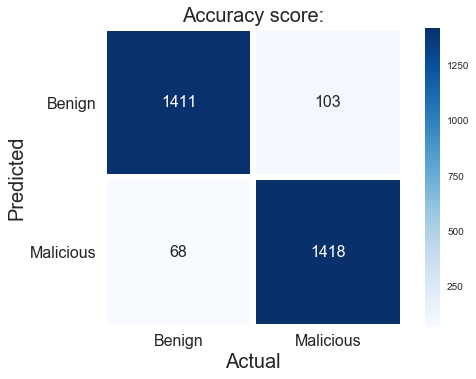

In [169]:
# Generate the evaluation report 

confusion_matrix_svm = confusion_matrix(y_test, y_test_svm_tunning)
classification_report_svm = classification_report(y_test,y_test_svm_tunning)

# Call the evaluation_report function
evaluation_report(confusion_matrix_svm,acc_test_svm_tunning,classification_report_svm)

In [164]:
print("Precision score: {}".format(precision_score(y_test,y_test_svm_tunning)))
print("Recall score: {}".format(recall_score(y_test,y_test_svm_tunning)))

Precision score: 0.9542395693135935
Recall score: 0.9322813938198553


## We will use AUC (Area Under Curve) as evaluation metric. The notebook is a binary classification problem. Thus, the AUC is adequate approache for evaluating the model. 

In [192]:
# Evaluation Metric
false_positive_svm_tuned, true_positive_svm_tuned, thresholds = roc_curve(y_test, y_test_svm_tunning)
roc_auc_score = auc(false_positive_svm_tuned, true_positive_svm_tuned)
print('AUC score: {}'.format(roc_auc_score))


AUC score: 0.9431521911628012


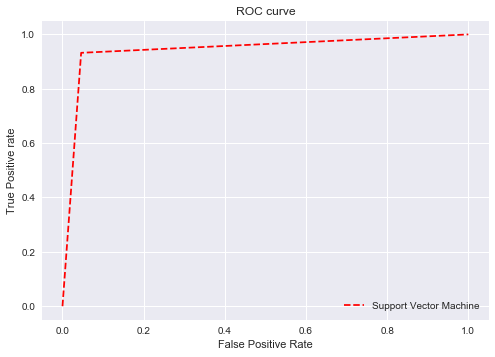

In [193]:
# plot roc curves

plt.plot(false_positive_svm_tuned, true_positive_svm_tuned, linestyle='--',color='red', label='Support Vector Machine')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show();

 ## The notebook make us of Cross-validation because we can estimate how accurately the module will perform  against unseen data in practice. 

In [152]:
# Cross validation of svm_tunning
# Implementing Kfold Cross Validation
# setting the number of slipts to 10
# shuffling the data before splitting into sub-sets
# and then the samples from the sub-sets will be taken randomly
Kfold = KFold(n_splits=10, random_state=10, shuffle= True)

# Implementng the cross_val_score which evaluate the score from the Kfold
# for an estimator we use the Support Vector Machine - tunned version
cross_validated_score = cross_val_score(svm_tunning, X_test, y_test, cv = Kfold)
 
print("Average accuracy: {}".format(cross_validated_score.mean()))

Average accuracy: 0.9306666666666669


# 9.3 Decision Tree Classifier

The second model uses Decision Tree Classifier for classifying our dataset.

A Decision Tree Classifier is used for classifying examples. 
Same as SVM, the Decision Tree is supervised machine learning algorithm, which uses multiple algorithms that splits the data continuously to a certain parameter. Then the result is used for predicting the class of the URL in our case. Greater explanation of how Decision Tree Classifier is working can be find in the Project report

In [300]:
# Implementing the Decision Tree Classifier 
# The tree will split the data until it reaches depth of 5
# which is the maximum depth in our case 
tree = DecisionTreeClassifier(max_depth = 5)

# Fitting the model with the training sets
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [301]:
# Perform prediction on the sets
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [302]:
# Computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.890
Decision Tree: Accuracy on test Data: 0.890


The overall accuracy of the testing data is 0.89 %. By applying the same method with tunning the parameters, we will try to increase the testing accuracy

In [137]:
# DeisionTreeClassifier tunning experiment

tree_tunning = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
 max_features=None, max_leaf_nodes=None,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 presort=False, random_state=0, splitter='best')

tree_tunning.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [138]:
# Perform classification on the testing and training set
y_test_tree_tunning = tree_tunning.predict(X_test)
y_train_tree_tunning = tree_tunning.predict(X_train)

In [139]:
#computing the accuracy of the model performance

acc_train_tree_tun = accuracy_score(y_train,y_train_tree_tunning)
acc_test_tree_tun = accuracy_score(y_test,y_test_tree_tunning)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree_tun))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree_tun))

Decision Tree: Accuracy on training Data: 0.956
Decision Tree: Accuracy on test Data: 0.944


             precision    recall  f1-score   support

          0       0.93      0.96      0.94      1479
          1       0.96      0.93      0.94      1521

avg / total       0.94      0.94      0.94      3000



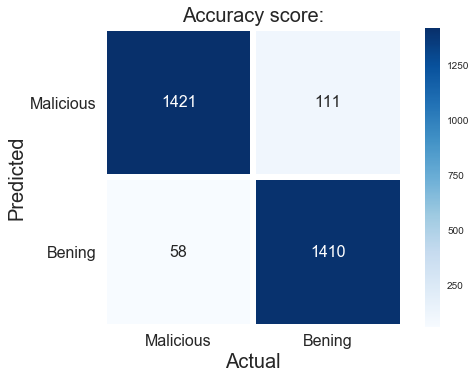

In [140]:
# Generate the evaluation report for Decision Tree Classifier

confusion_matrix_tree = confusion_matrix(y_test, y_test_tree_tunning)
classification_report_tree = classification_report(y_test,y_test_tree_tunning)
accuracy_test_tree = accuracy_score(y_test,y_test_tree_tunning)

# Call the evaluation_report function
evaluation_report(confusion_matrix_tree,accuracy_test_tree,classification_report_tree)

In [181]:
# Evaluation metric
false_positive_tree, true_positive_tree, thresholds = roc_curve(y_test, y_test_tree_tunning)
roc_auc_score = auc(false_positive_tree, true_positive_tree)
print('AUC score: {}'.format(roc_auc_score))

AUC score: 0.9439030049889778


In [142]:
# Implementing Kfold Cross Validation
# setting the number of slipts to 10
# shuffling the data before splitting into sub-sets
# and then the samples from the sub-sets will be taken randomly
k = 10
Kfold = KFold(n_splits=k, random_state=10, shuffle= True)

# Implementng the cross_val_score which evaluate the score from the Kfold
# for an estimator we use the Decision Tree Classifier - tunned version
cross_validated_score = cross_val_score(tree_tunning, X_test, y_test, cv = Kfold)

print("Average accuracy: {}".format(cross_validated_score.mean()))

Average accuracy: 0.93


# 9.4 Random Forest Classifier 

The third model uses Random Forest Classifier for classifying our dataset.

Random Forest Classifier is a powerful machine learning algorithm. Greater explanation can be found in the Project report.

In [143]:
# Implementing the Random Forest Classifier 
# The tree will split the data until it reaches depth of 5
# which is the maximum depth in our case 
rfc = RandomForestClassifier(max_depth = 5)

# Fitting the model with the training set
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [144]:
# Perform prediction on the sets
y_test_rfc = rfc.predict(X_test)
y_train_rfc = rfc.predict(X_train)

# Computing the accuracy of the model performance
acc_train_rfc = accuracy_score(y_train,y_train_rfc)
acc_test_rfc = accuracy_score(y_test,y_test_rfc)
print("Random Forest Classifier: Accuracy on training Data: {:.3f}".format(acc_train_rfc))
print("Random Forest Classifier: Accuracy on test Data: {:.3f}".format(acc_test_rfc))

Random Forest Classifier: Accuracy on training Data: 0.902
Random Forest Classifier: Accuracy on test Data: 0.902


In [182]:
false_positive_rfc, true_positive_rfc, thresholds = roc_curve(y_test, y_test_rfc)
roc_auc_score = auc(false_positive_rfc, true_positive_rfc)
print('AUC score: {}'.format(roc_auc_score))

AUC score: 0.9027856126467455


### Here we are going to apply grid search to find the best tunned parameters; so we can boost the performance of the model.

In [111]:
# Find best tunning params 

# Calling the classifier constructor
rfc_params = RandomForestClassifier()

# Making list of all the parameters we want to tune
n_estimators = [5,10,100]
max_depth = [None,5,10]
max_features = [None,5,10]

grid_parameters = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth":max_depth
}


# Pass the classifier and parameters and the number of iterations in the GridSearchCV method. 
cv = GridSearchCV(rfc_params,grid_parameters,cv=5)

# Fitting the training set - we use ravel() to convert the set to a one-dimensional array
cv.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 100], 'max_features': [None, 5, 10], 'max_depth': [None, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [116]:
# Tunning_params display the parameters for each iteration and then prints the best one
# The best parameters are based on the best accuracy of the parameters evaluated in the iterations
# Referencing: https://www.datasciencelearner.com/how-to-improve-accuracy-of-random-forest-classifier/
def tunning_params(tunned_params):
    print('Best parameters are: {}'.format(tunned_params.best_params_),'\n')
    mean_score = tunned_params.cv_results_['mean_test_score']
    std_score = tunned_params.cv_results_['std_test_score']
    params = tunned_params.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params} ')

In [117]:
# Calling the function
tunning_params(cv)

Best parameters are: {'max_depth': None, 'max_features': 5, 'n_estimators': 100} 

0.942 + or -0.007 for the {'max_depth': None, 'max_features': None, 'n_estimators': 5} 
0.944 + or -0.006 for the {'max_depth': None, 'max_features': None, 'n_estimators': 10} 
0.945 + or -0.006 for the {'max_depth': None, 'max_features': None, 'n_estimators': 100} 
0.944 + or -0.006 for the {'max_depth': None, 'max_features': 5, 'n_estimators': 5} 
0.944 + or -0.007 for the {'max_depth': None, 'max_features': 5, 'n_estimators': 10} 
0.946 + or -0.007 for the {'max_depth': None, 'max_features': 5, 'n_estimators': 100} 
0.941 + or -0.007 for the {'max_depth': None, 'max_features': 10, 'n_estimators': 5} 
0.943 + or -0.005 for the {'max_depth': None, 'max_features': 10, 'n_estimators': 10} 
0.944 + or -0.006 for the {'max_depth': None, 'max_features': 10, 'n_estimators': 100} 
0.903 + or -0.007 for the {'max_depth': 5, 'max_features': None, 'n_estimators': 5} 
0.903 + or -0.011 for the {'max_depth': 5, 'ma

In [170]:
# Random Forest Classifier Tunning Experiment

rfc_tunning = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', max_features= None, max_depth= None,
                                    random_state=1, warm_start = True, bootstrap= True)

# Fitting the model with the training set
rfc_tunning.fit(X_train, y_train)

# Perform prediction on the training set 
y_test_rfc_tunning = rfc_tunning.predict(X_test)
y_train_rfc_tunning = rfc_tunning.predict(X_train)

# Compute the accuracy of the model's performance
acc_train_rfc_tunning = accuracy_score(y_train,y_train_rfc_tunning)
acc_test_rfc_tunning = accuracy_score(y_test,y_test_rfc_tunning)

# Display the accuracy of the model
print("Random Forest Classifier: Accuracy on training Data: {:.3f}".format(acc_train_rfc_tunning))
print("Random Forest Classifier: Accuracy on test Data: {:.3f}".format(acc_test_rfc_tunning))


Random Forest Classifier: Accuracy on training Data: 0.956
Random Forest Classifier: Accuracy on test Data: 0.945


             precision    recall  f1-score   support

          0       0.93      0.96      0.94      1479
          1       0.96      0.93      0.94      1521

avg / total       0.95      0.94      0.94      3000



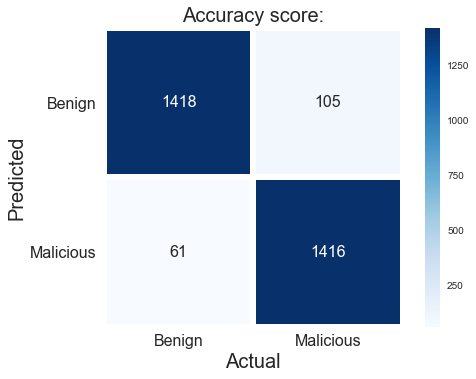

In [171]:
# Generate the evaluation report for Random Forest Classifier

confusion_matrix_tree = confusion_matrix(y_test, y_test_rfc_tunning)
classification_report_tree = classification_report(y_test,y_test_rfc_tunning)

# Call the evaluation_report function
evaluation_report(confusion_matrix_tree,acc_test_rfc_tunning,classification_report_tree)

## To determine if our model is over fitting we are going to test it on unseen data or first seen data.
## The notebook make us of Cross-validation because we can estimate how accurately the module will perform  against unseen data in practice. 

In this notebook we apply Kfold Cross-Validation. We split the dataset into K number of sub-sets , in our case we are going to test it with k-10, the sub-sets are used to train the model and the last one is kept for testing the model, often the last sub-set is refered to as validation set. After testing the model, the average score is calculated by taking the mean of each sub-set's score.  

In [196]:
# Implementing Kfold Cross Validation
# setting the number of slipts to 10
# shuffling the data before splitting into sub-sets
# and then the samples from the sub-sets will be taken randomly
# Referencing: https://www.askpython.com/python/examples/k-fold-cross-validation
k = 10
Kfold = KFold(n_splits=k, random_state=10, shuffle= True)

# Implementng the cross_val_score which evaluate the score from the Kfold
# for an estimator we use the Random Forest Classifier - tunned version
cross_validated_score = cross_val_score(rfc_tunning, X_test, y_test, cv = Kfold)

print("Average accuracy: {}".format(cross_validated_score.mean()))

Average accuracy: 0.9316666666666666


### From the output here we can conclude that the model performs almost the same against unseen or first seen data. Therefore, the predictive model must perform with the same accuracy in practice. 

### AUC evaluation metric

In [197]:
# Evaluation Metric -
false_positive_rfc_tuned, true_positive_rfc_tuned, thresholds = roc_curve(y_test, y_test_rfc_tunning)
roc_auc_score = auc(false_positive_rfc_tuned, true_positive_rfc_tuned)
print('AUC score: {}'.format(roc_auc_score))



AUC score: 0.9448611927937874


# 10. Conclusion

## We will use AUC-ROC as evaluation metric. 

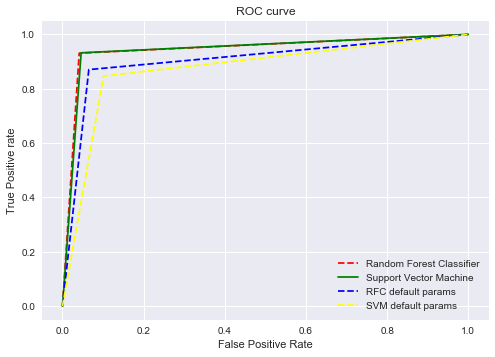

In [194]:
# plot roc curves

plt.plot(false_positive_rfc_tuned, true_positive_rfc_tuned, linestyle='--',color='red', label='Random Forest Classifier')
plt.plot(false_positive_svm_tuned, true_positive_svm_tuned, linestyle='-',color='green', label='Support Vector Machine')
plt.plot(false_positive_rfc, true_positive_rfc, linestyle= '--', color='blue',label= 'RFC default params')
plt.plot(false_positive_svm, true_positive_svm, linestyle='--',color='yellow', label= 'SVM default params')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show();

# 11. References

https://github.com/shreyagopal/Phishing-Website-Detection-by-Machine-Learning-Techniques/blob/master/Phishing%20Website%20Detection_Models%20%26%20Training.ipynb

https://github.com/surajr/URL-Classification/blob/master/URL%20Classification.ipynb

https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb

https://github.com/NetsecExplained/Machine-Learning-for-Security-Analysts/blob/master/Workbooks/Workbook_(complete)_Malicious_URL_Predictor.ipynb